In [93]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
sales_of_company_x = pd.read_csv("./data/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("./data/monthly-boston-armed-robberies-j.csv")
mean_monthly_temp = pd.read_csv("./data/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("./data/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("./data/daily-total-female-births-in-cal.csv")

In [ ]:
all_series = {
    "Monthly sales of company X": sales_of_company_x['Count'],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

## Задание 1

In [37]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [38]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        pd.Series(y).plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(pd.Series(y), lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(pd.Series(y), lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

## Этап 4.1

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


g:\Avito\dev\.venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


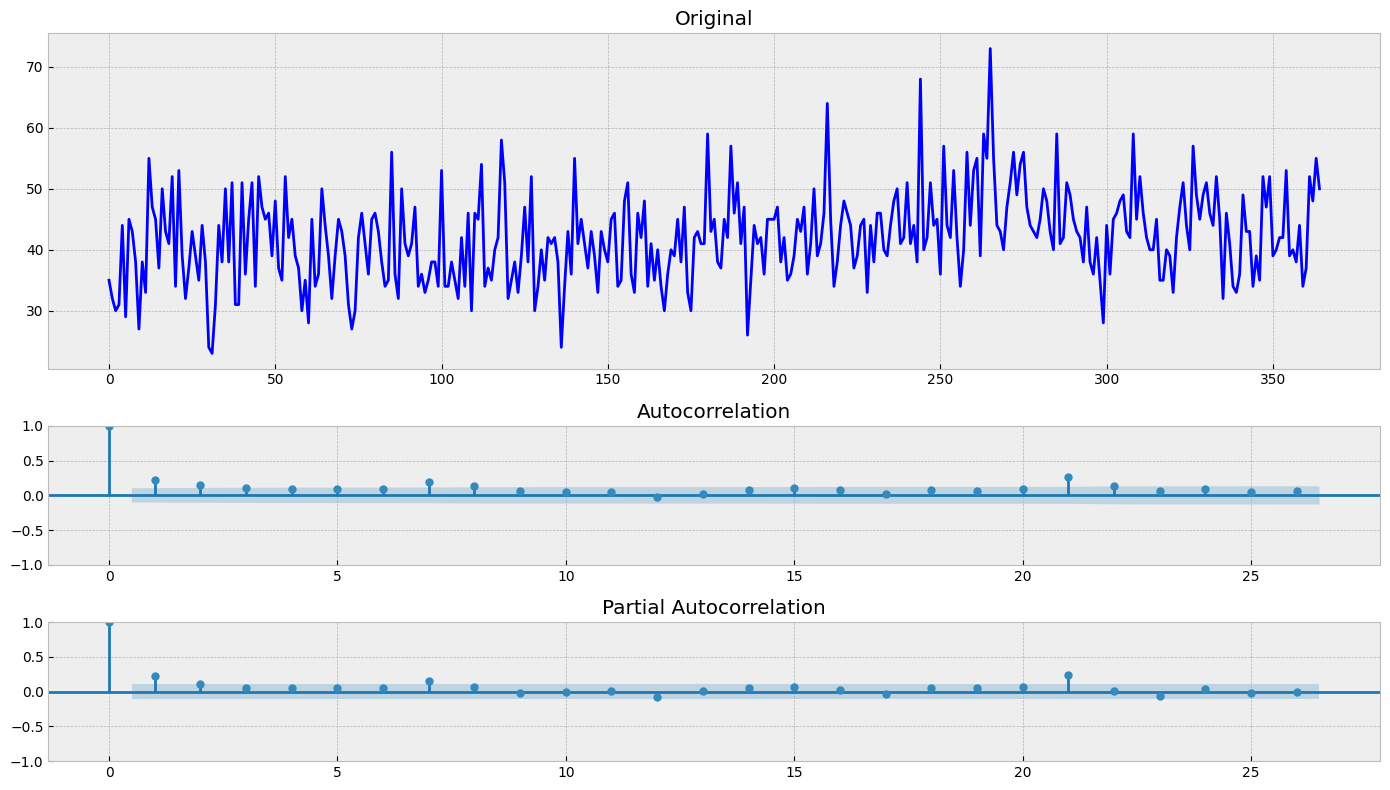

In [39]:
bt_series = all_series['Daily total female births in California']
tsplot(bt_series)

p-value меньше alpha (0.05)
Нулевая гипотеза о нестационарности ряда может быть отклонена => ряд стационарен

## Этап 4.2

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


g:\Avito\dev\.venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


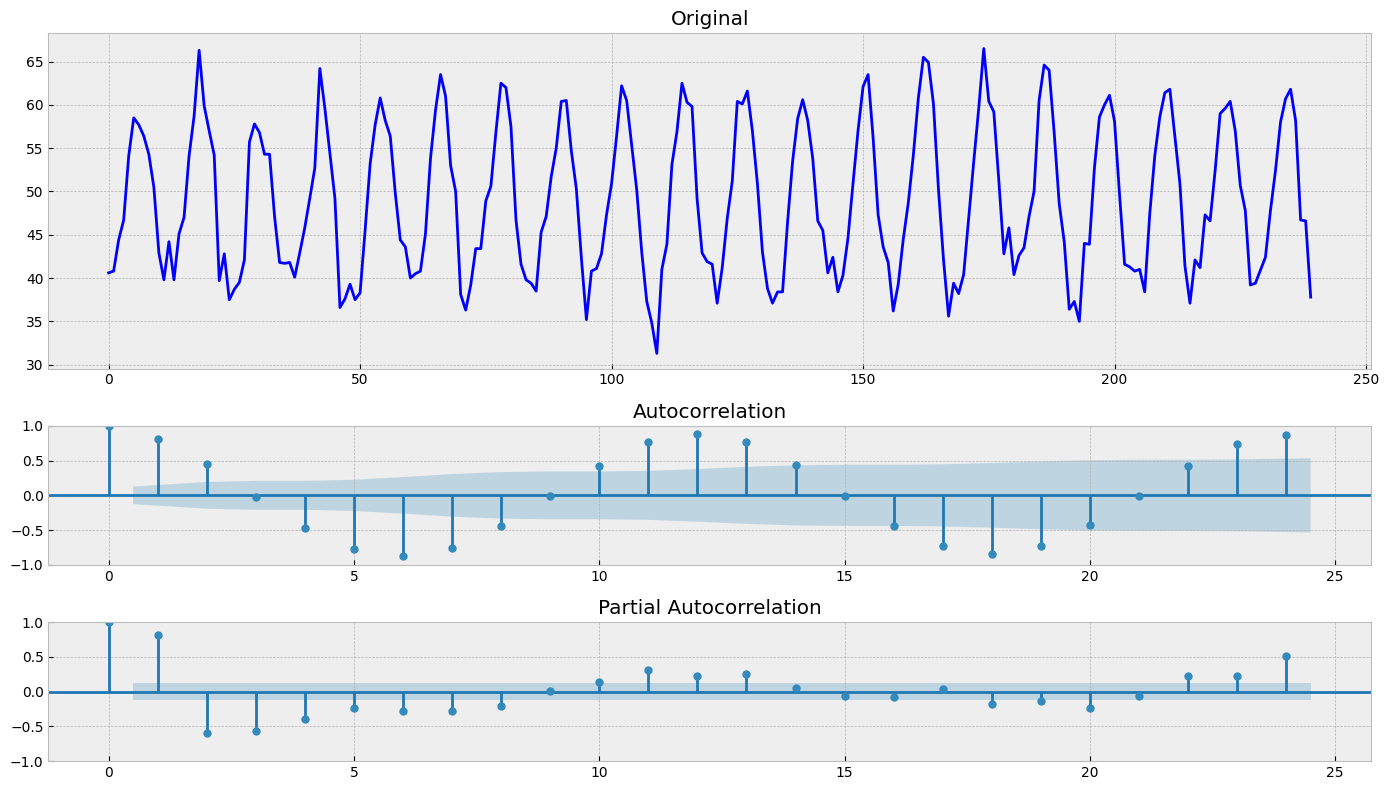

In [40]:
temp_series = all_series['Mean monthly air temperature (Deg. F) Nottingham Castle']
tsplot(temp_series)

p-value меньше alpha (0.05)
Нулевая гипотеза о нестационарности ряда может быть отклонена => ряд стационарен

## Этап 4.3

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


g:\Avito\dev\.venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


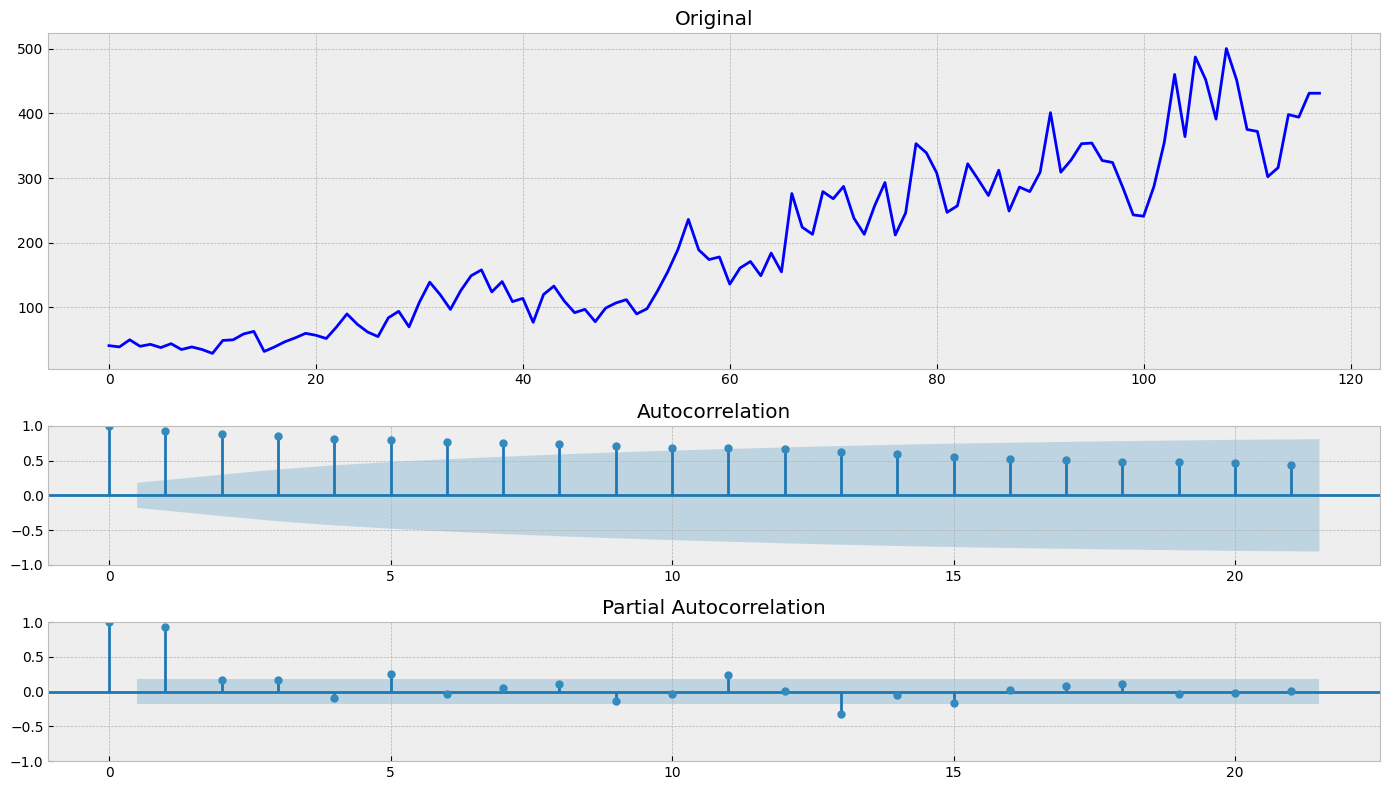

In [41]:
robberies_series = all_series['Monthly Boston armed robberies']
tsplot(robberies_series)

p-value больше alpha (0.05)
Нулевая гипотеза о нестационарности ряда не может быть отклонена => ряд нестационарен

На графике автокорреляции видим сильную корреляцию на лаге в 1 - продифференцируем ряд

Results of Dickey-Fuller Test:
Test Statistic                -7.428564e+00
p-value                        6.450795e-11
#Lags Used                     1.000000e+01
Number of Observations Used    1.060000e+02
Critical Value (1%)           -3.493602e+00
Critical Value (5%)           -2.889217e+00
Critical Value (10%)          -2.581533e+00
dtype: float64


g:\Avito\dev\.venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


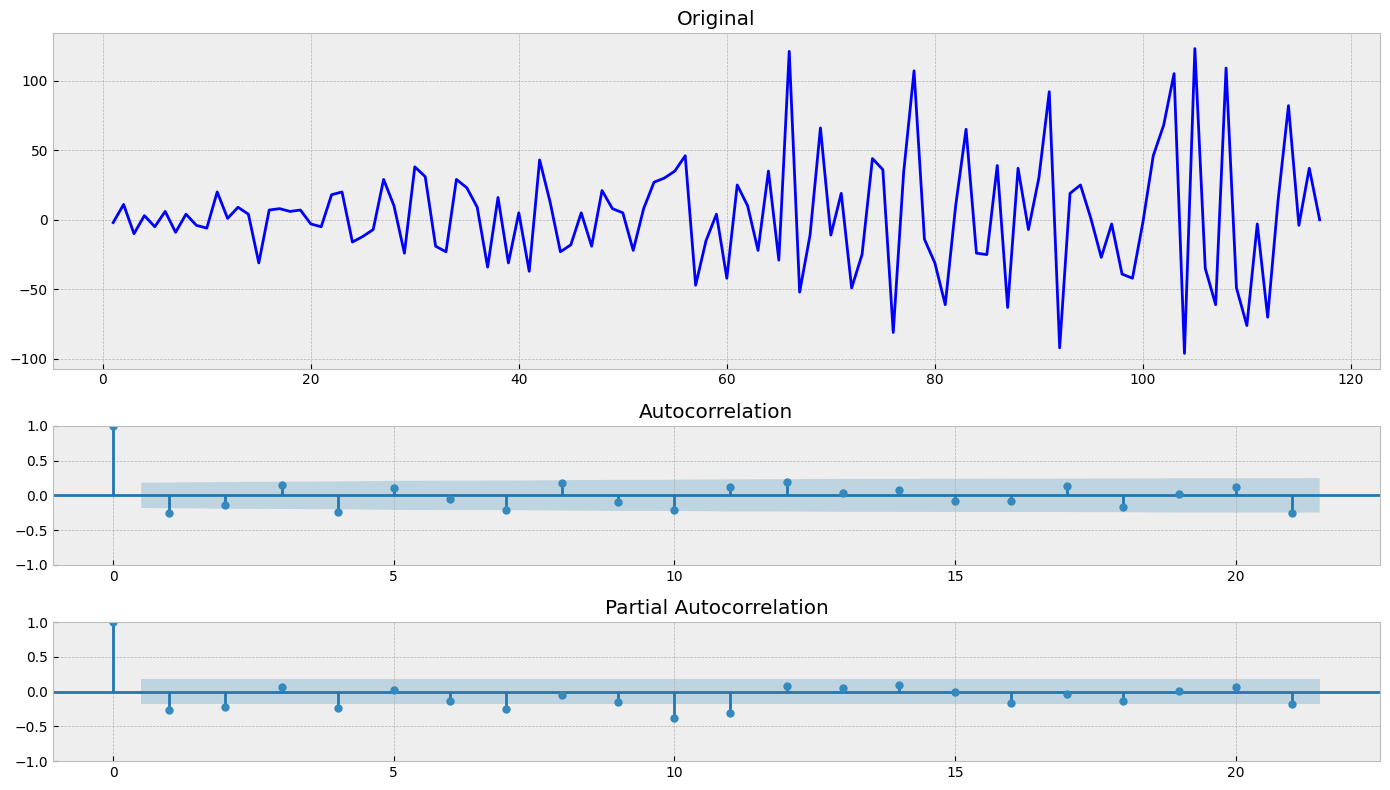

In [44]:
tsplot(pd.Series(robberies_series).diff(1).dropna())

p-value меньше alpha (0.05)
Нулевая гипотеза о нестационарности ряда может быть отклонена => ряд стационарен

## Этап 4.4

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


g:\Avito\dev\.venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


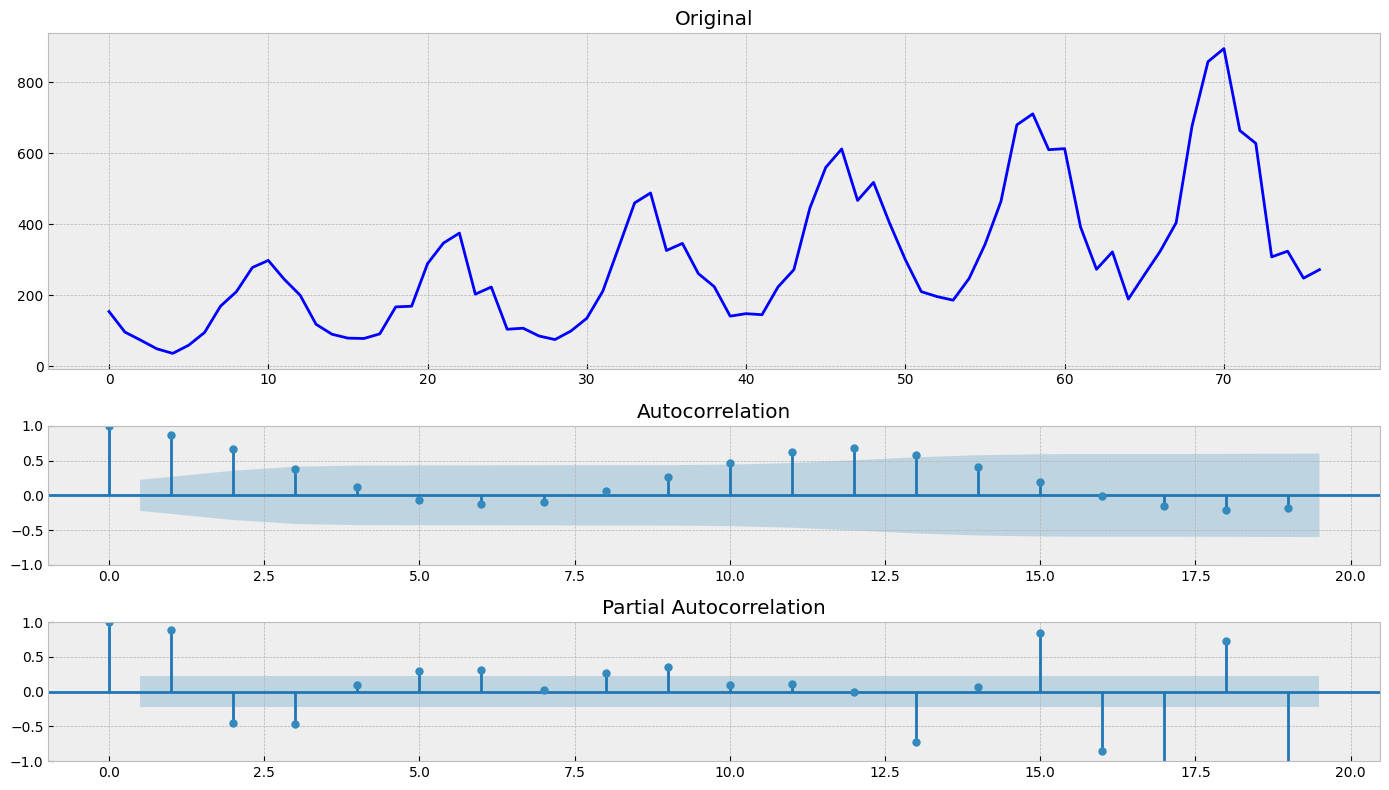

In [45]:
#Monthly sales of company X
sales_series = all_series['Monthly sales of company X']
tsplot(sales_series)

p-value больше alpha (0.05)
Нулевая гипотеза о нестационарности ряда не может быть отклонена => ряд нестационарен

Применим преобразования бокса-кокса для приведения нашего ряда к более нормальному виду

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


g:\Avito\dev\.venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


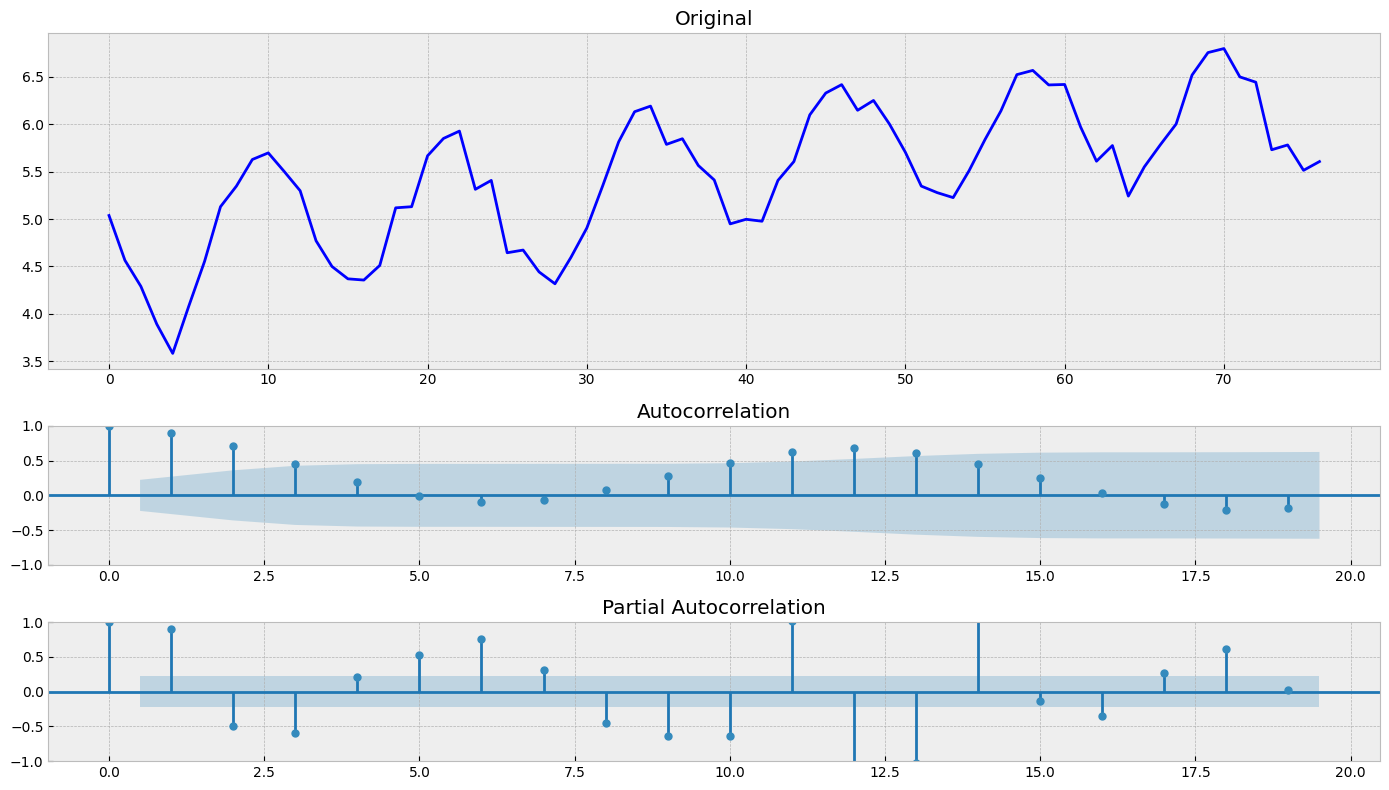

In [55]:
sales_series = boxcox(sales_series, 0)
tsplot(sales_series)

Проведем дифференцирование с лагом в 1 день

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


g:\Avito\dev\.venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


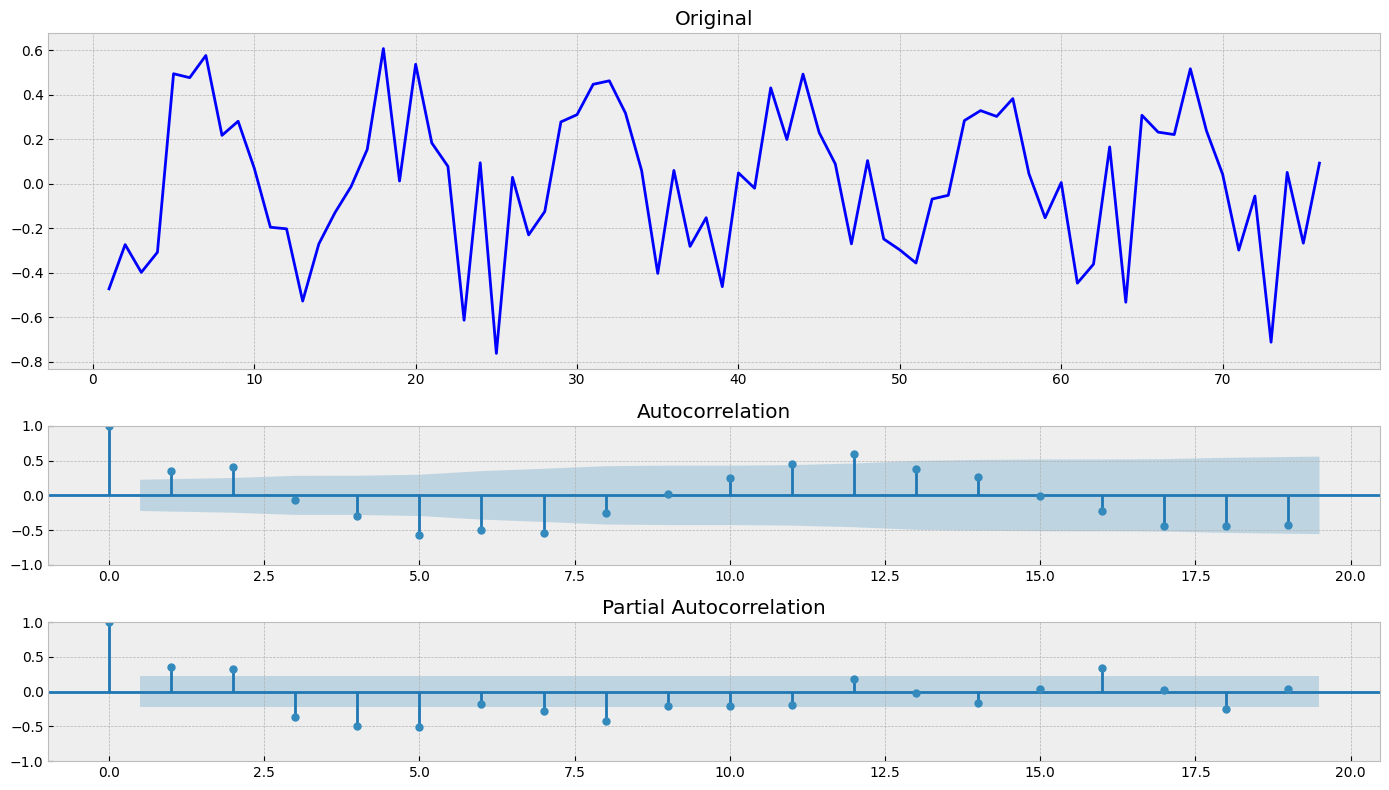

In [56]:
tsplot(pd.Series(sales_series).diff(1).dropna())

p-value меньше alpha (0.05)
Нулевая гипотеза о нестационарности ряда может быть отклонена => ряд стационарен

## Этап 4.5

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


g:\Avito\dev\.venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


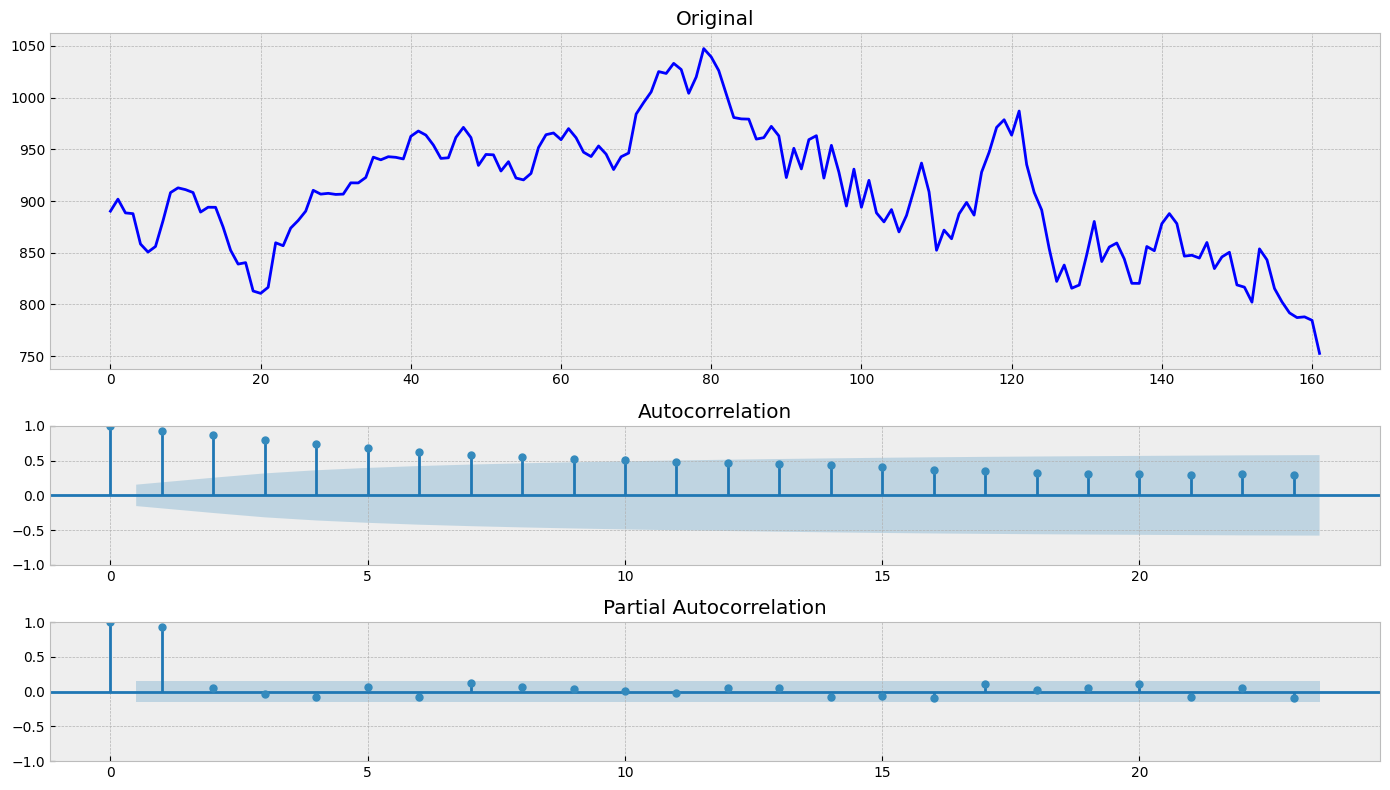

In [57]:
#Weekly closings of the Dow-Jones industrial average
dj_series = all_series['Weekly closings of the Dow-Jones industrial average']
tsplot(dj_series)

p-value больше alpha (0.05)
Нулевая гипотеза о нестационарности ряда не может быть отклонена => ряд нестационарен

Применим преобразования бокса-кокса для приведения нашего ряда к более нормальному виду

Results of Dickey-Fuller Test:
Test Statistic                  -1.194087
p-value                          0.676134
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


g:\Avito\dev\.venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


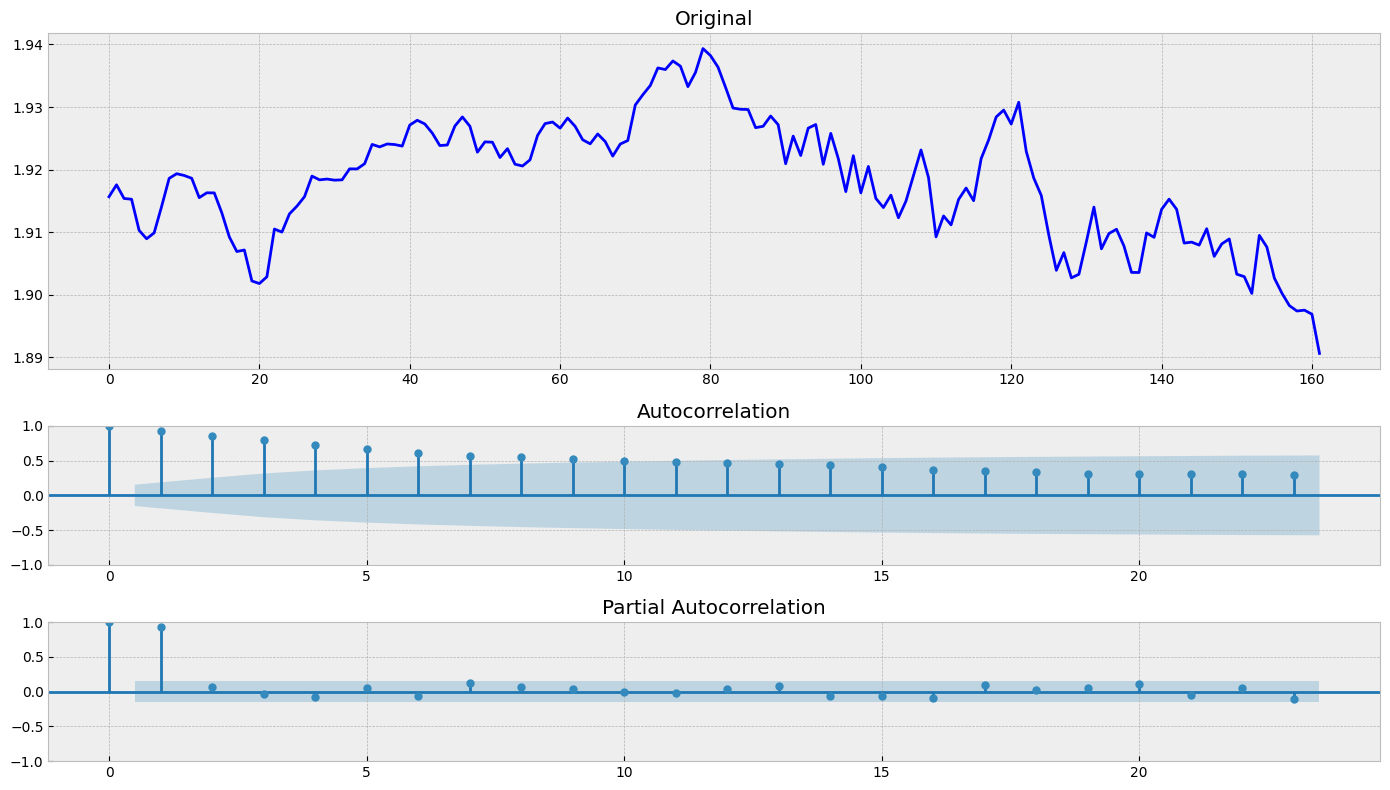

In [59]:
dj_series = boxcox(dj_series, 0)
tsplot(dj_series)

Проведем дифференцирование с лагом в 1 день

Results of Dickey-Fuller Test:
Test Statistic                -1.298955e+01
p-value                        2.831309e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


g:\Avito\dev\.venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


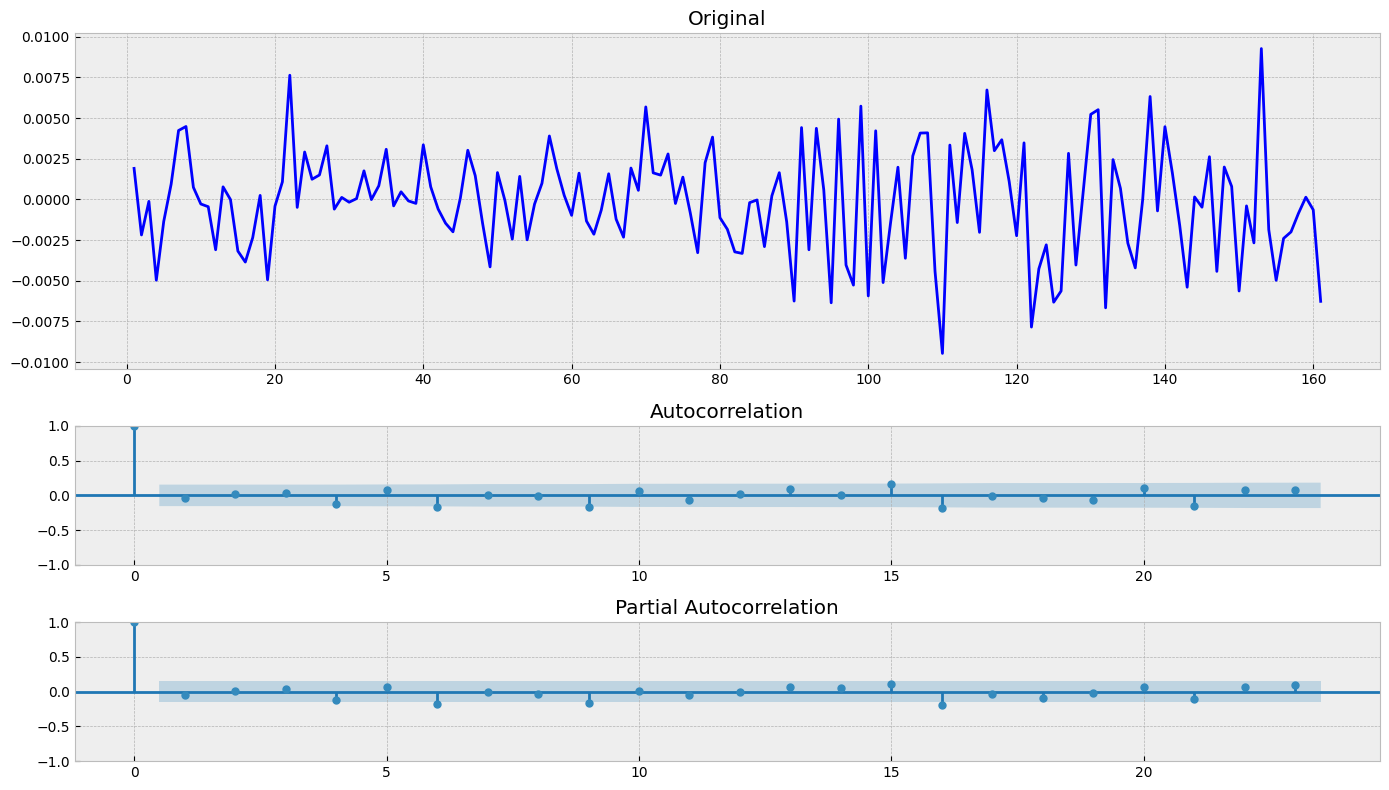

In [60]:
tsplot(pd.Series(dj_series).diff(1).dropna())


## Задание 2


In [4]:
def ma(series: pd.Series, windows: int):
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    return series.rolling(windows).mean()

In [5]:
def ma_predict(series: pd.Series, windows: int, n_pred: int):
    new_series = series.copy()
    for _ in range(n_pred):
        new_series = new_series.append(pd.Series([new_series[-windows:].mean()]), ignore_index=True)
    return new_series

In [6]:
def wma(series: pd.Series, windows: int, weights: np.array, n_pred: int) -> pd.Series:
    if not isinstance(weights, np.ndarray):
        weights = np.array(weights)
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    wma = series.rolling(windows).apply(lambda s: (s * weights).sum() / weights.sum(), raw=True)
    return wma

In [224]:
def wma_predict(series: pd.Series, windows: int, n_pred: int, weights: np.array) -> pd.Series:
    new_series = series.copy()
    if not isinstance(weights, np.ndarray):
        weights = np.array(weights)
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    for _ in range(n_pred):
        new_series = new_series.append(pd.Series([new_series[-windows:].rolling(windows).apply(lambda s: (s * weights).sum() / weights.sum(), raw=True).iloc[-1]]), ignore_index=True)
        
    return new_series

In [7]:
def ema(series: pd.Series, alpha: float):
    result = [series[0]]
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return pd.Series(result)

In [8]:
def ema_pred(series, alpha, n_pred=None):
    result = [series[0]]
    for n in range(1, len(series)):
        result.append(alpha * series[n-1] + (1 - alpha) * result[n-1])
    if not n_pred:
        return pd.Series(result)
    
    predictions = [alpha * series[len(series) - 1] + (1 - alpha) * result[-1]]

    for _ in range(n_pred):
        res = alpha * predictions[-1] + (1 - alpha) * result[-1]
        result.append(res)
        predictions.append(res)
    
    return series.append(pd.Series(predictions), ignore_index=True), pd.Series(result)

In [9]:
def dema(series, alpha, beta):
    result = [series[0]]
    level, trend = series[0], series[1] - series[0]
    for n in range(1, len(series)):
        value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return pd.Series(result)

In [10]:
def dema_pred(series, alpha, beta, n_preds):
    result = [series[0]]
    level, trend = series[0], series[1] - series[0]
    for n in range(1, len(series)):
        value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
        
    preds = []
    for n in range(n_preds):
        value = result[-1]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
        preds.append(level+trend)

    return series.append(pd.Series(preds), ignore_index=True), pd.Series(result)

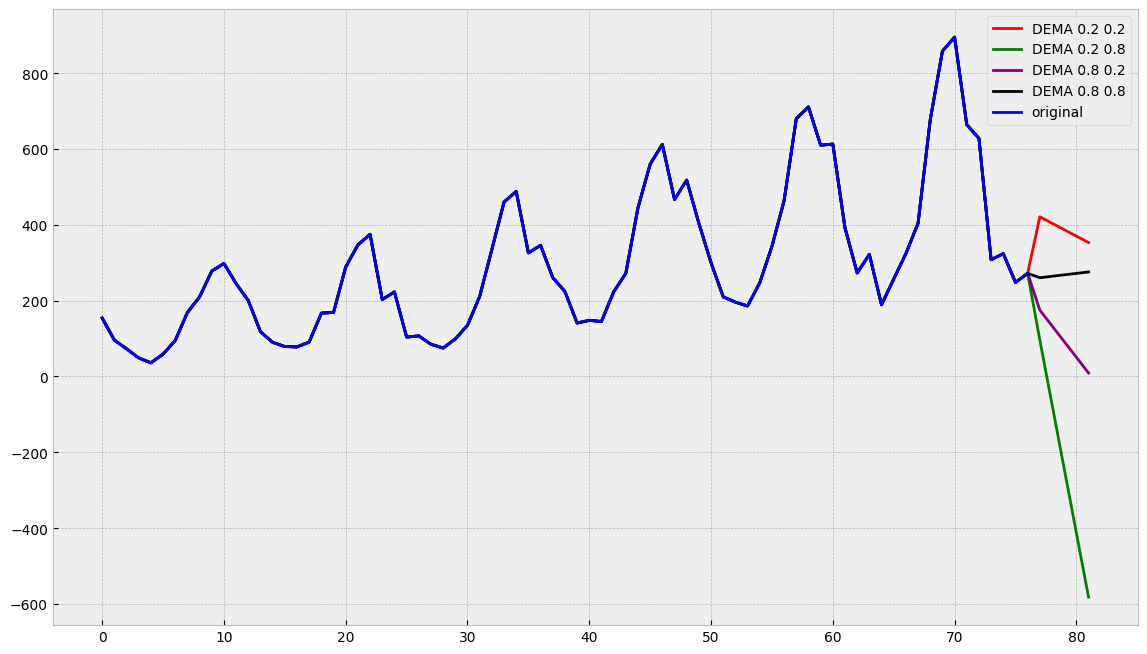

In [103]:
alphas = [0.2,0.2,0.8,0.8]
bettas = [0.2,0.8,0.2,0.8]
colors = ['red', 'green', 'purple', 'black']
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    for i in range(len(alphas)):
        ser, _ = dema_pred(sales_of_company_x["Count"], alphas[i], bettas[i], 5)
        plt.plot(ser, color=colors[i], linewidth='2', label='DEMA {} {}'.format(alphas[i], bettas[i]))
    plt.plot(sales_of_company_x["Count"], color='blue',label='original')
    plt.legend()

In [63]:
def initial_trend(series, season_len):
    return sum([float(series[i + season_len] - series[i]) / season_len]) / season_len

def initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(series[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals

def tema(series, slen, alpha, beta, gamma, n_preds):
    result = []
    seasonals = initial_seasonal_components(series, slen)
    for i in range(len(series)+n_preds):
        if i == 0: # initial values
            smooth = series[0]
            trend = initial_trend(series, slen)
            result.append(series[0])
            continue
        if i >= len(series): # we are forecasting
            m = i - len(series) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = series[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result

In [67]:
def plot_tema(alpha, beta, gamma, ser=sales_of_company_x["Count"], ser_to_plot=sales_of_company_x["Count"], n_preds=24):
    s_tema = tema(ser, 12, alpha, beta, gamma, n_preds)
    with plt.style.context('bmh'):
        plt.figure(figsize=(14, 8))
        plt.plot(ser_to_plot, color='blue',label='original')
        plt.plot(tema, color='red', linewidth='4', label='TEMA')
        plt.title("alpha={}, beta={}, gamma={}".format(alpha, beta, gamma))
        plt.legend()

Ряд имеет сезонность - TEMA применим

In [ ]:
s_true = sales_of_company_x["Count"]
s_ema = ema(s_true, 0.3)
s_wma = wma(s_true, 7, [1,1,2,3,5,8,13])
s_ma = ma(s_true, 7)
s_dema = dema(s_true, 0.6, 0.2)

models = {
    'Moving average': s_ma,
    'Weighted moving average': s_wma,
    'Exponential moving average': s_ema,
    'Double exponential MA': s_dema,
}

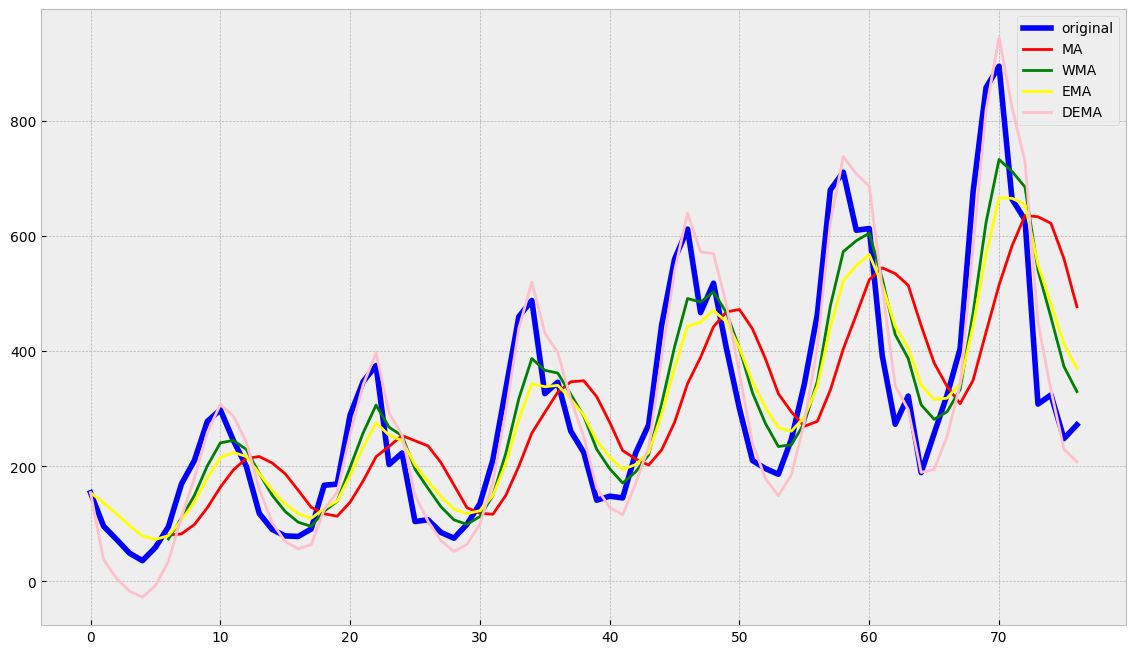

In [13]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(sales_of_company_x["Count"], color='blue', linewidth='4', label='original')
    plt.plot(s_ma, color='red', linewidth='2', label='MA')
    plt.plot(s_wma, color='green', linewidth='2', label='WMA')
    plt.plot(s_ema, color='yellow', linewidth='2', label='EMA')
    plt.plot(s_dema, color='pink', linewidth='2', label='DEMA')
    plt.legend()

In [138]:
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

train, test, val = s_true[:60], s_true[60:70], s_true[70:]

### Оценим модель MA

In [147]:
def ma_mse(X):
    windows = X
    result = ma_predict(train, windows, len(test))
    predictions = result[-len(test):]
    
    error = mean_squared_error(y_true=predictions, y_pred=test, squared=True)
    return error

In [168]:
#Просто итерируемся и ищем окно при котором MSE минимален
def find_min_ma_window():
    min_w = 1
    min_mse = ma_mse(min_w)

    for i in range(len(train)//2):
        if ma_mse(i) < min_mse:
            min_mse = ma_mse(i)
            min_w = i
    return min_w

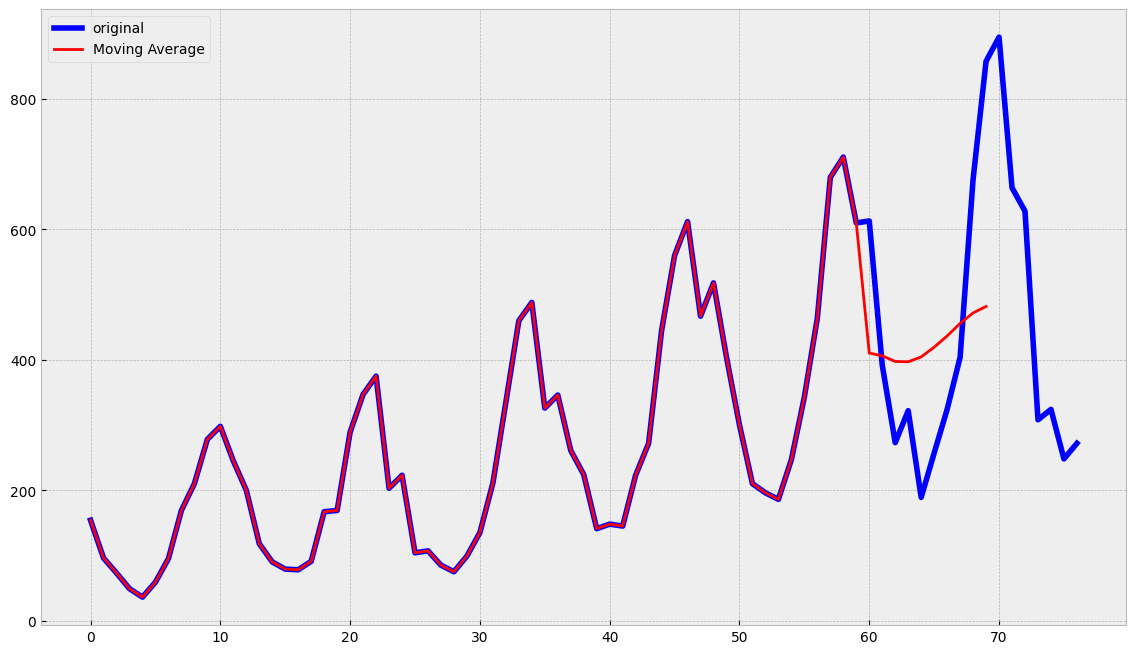

In [255]:
ma_fit =  ma_predict(train, find_min_ma_window(), len(test))

with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(sales_of_company_x["Count"], color='blue', linewidth='4', label='original')
    plt.plot(ma_fit, color='red', linewidth='2', label='Moving Average')
    
    plt.legend()

### Оценим модель WMA

In [235]:
def wma_mse(X):
    windows = 7
    weights = X
    
    result = wma_predict(train, windows, len(test), weights)
    predictions = result[-len(test):]
    
    error = mean_squared_error(y_true=predictions, y_pred=test, squared=True)
    return error

In [236]:
#Минимизируем коэффициенты (для простоты я решил оставить число окон =7)
opt_wma = minimize(wma_mse, x0=[1,1,2,3,5,8,13], method="L-BFGS-B", bounds = ((0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None)))

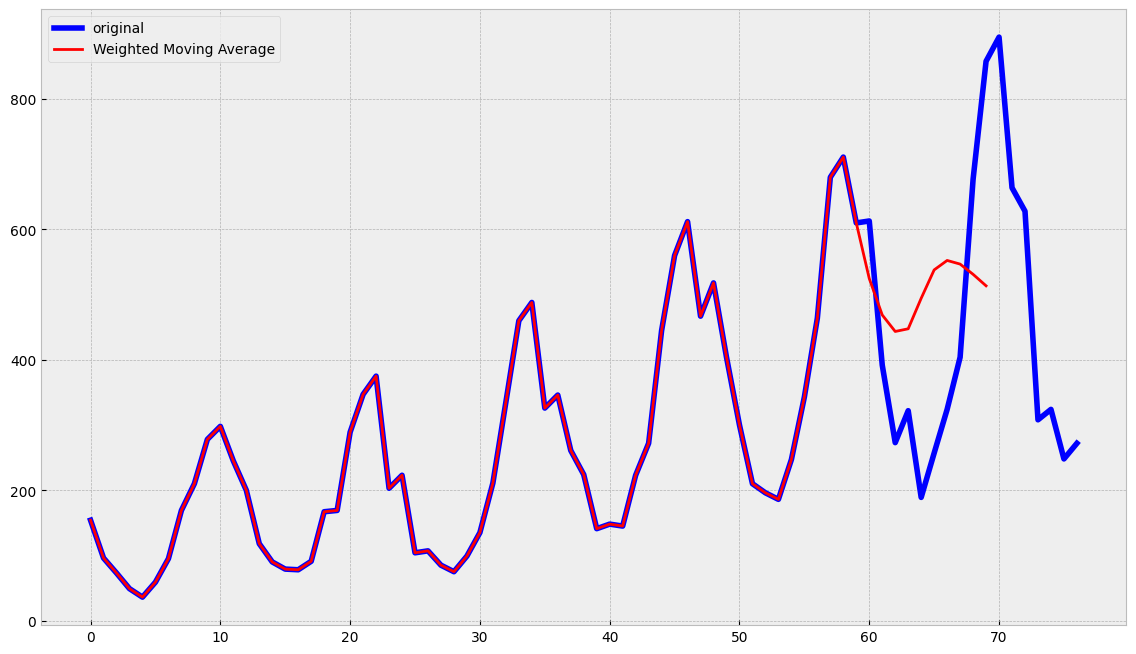

In [256]:
wma_fit = wma_predict(train, 7, len(test), list(opt_wma.x))

with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(sales_of_company_x["Count"], color='blue', linewidth='4', label='original')
    
    plt.plot(wma_fit, color='red', linewidth='2', label='Weighted Moving Average')
    
    plt.legend()

## Оценим модель EMA

In [248]:
def ema_mse(X):
    alpha = X
    
    result = ema_pred(train, alpha, len(test))[0]
    predictions = result[-len(test):]
    
    error = mean_squared_error(y_true=predictions, y_pred=test, squared=True)
    return error

In [253]:
opt_dema = minimize(ema_mse, x0=[0], method="L-BFGS-B", bounds = ((None, None),))
opt_dema

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 41535.29000000049
        x: [ 1.827e+00]
      nit: 6
      jac: [-4.657e-02]
     nfev: 34
     njev: 17
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>

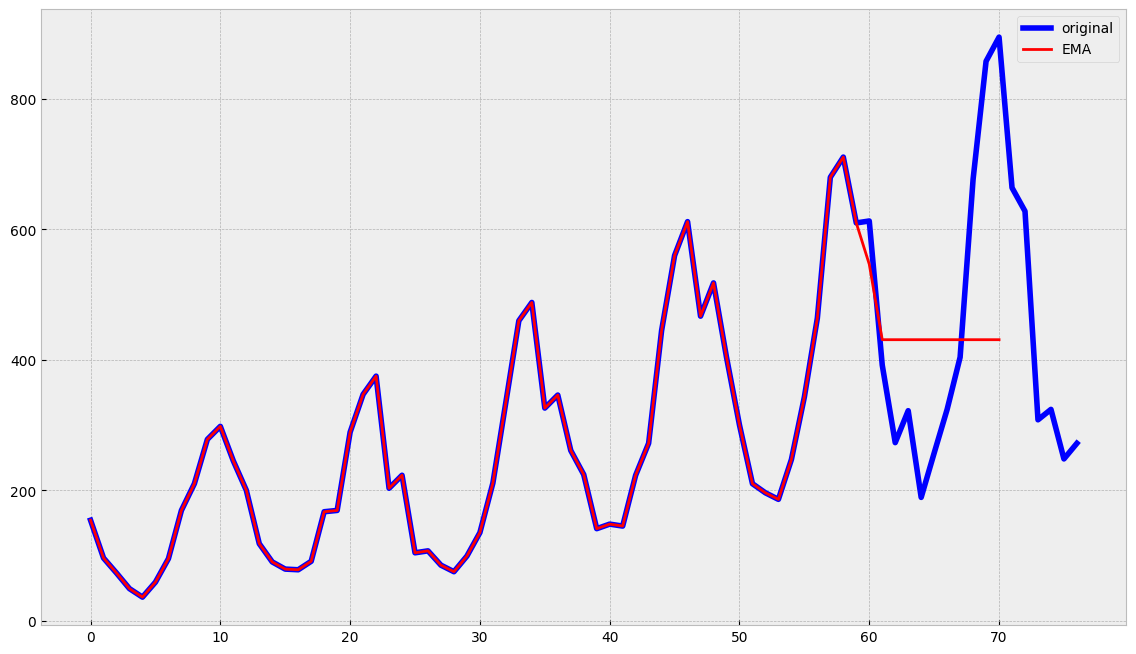

In [257]:
ema_fit = ema_pred(train, opt_dema.x[0], len(test))[0]

with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(sales_of_company_x["Count"], color='blue', linewidth='4', label='original')
    
    plt.plot(ema_fit, color='red', linewidth='2', label='EMA')
    plt.legend()

### Оптимизируем модель DEMA

In [239]:
def dema_mse(X):
    alpha, beta = X
    result = dema_pred(train, alpha, beta, len(test))[0]
    predictions = result[-len(test):]
    
    m_mse = mean_squared_error(y_true=predictions, y_pred=test, squared=True)
    return m_mse

In [240]:
opt_dema = minimize(dema_mse, x0=[0,0], method="L-BFGS-B", bounds = ((0, 1), (0, 1)))
dema_alpha_opt, dema_beta_opt = opt_dema.x

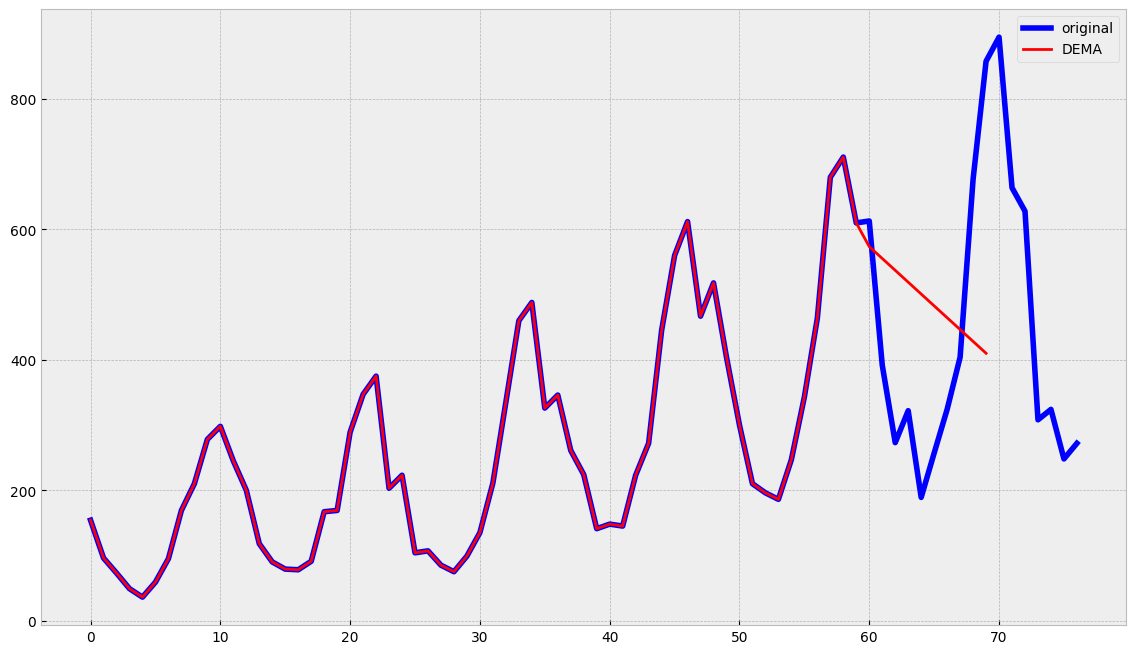

In [258]:
dema_fit = dema_pred(train, dema_alpha_opt, dema_beta_opt, len(test))[0]

with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(sales_of_company_x["Count"], color='blue', linewidth='4', label='original')
    
    plt.plot(dema_fit, color='red', linewidth='2', label='DEMA')
    plt.legend()

## Оптимизируем модель TEMA

In [ ]:
def tema_mse(X):
    alpha, beta, gamma = X
    result = tema(train, 12, alpha, beta, gamma, len(test))
    predictions = result[-len(test):]
    error = mean_squared_error(predictions, test)
    return error

{'Moving average': {'MSE': 30043.957746478874, 'RMSE': 173.33192939120846, 'MAE': 141.61569416498992, 'R2': 0.20012348020172477}}
{'Weighted moving average': {'MSE': 8519.80179516031, 'RMSE': 92.30277241318547, 'MAE': 74.50149381135296, 'R2': 0.7731727135689167}}
{'Exponential moving average': {'MSE': 11192.174056358905, 'RMSE': 105.79307187315672, 'MAE': 83.10526354390379, 'R2': 0.7120119751217832}}
{'Double exponential MA': {'MSE': 3219.4958947836335, 'RMSE': 56.740601819011694, 'MAE': 47.11158226298903, 'R2': 0.9171585199467582}}


In [259]:
def model_metrics(series_true: pd.Series, series_pred: pd.Series):
    m_mse = mean_squared_error(y_true=series_true, y_pred=series_pred, squared=True)
    m_rmse = mean_squared_error(y_true=series_true, y_pred=series_pred, squared=False)
    m_mae = mean_absolute_error(y_true=series_true, y_pred=series_pred)
    m_r2 = r2_score(y_true=series_true, y_pred=series_pred)
    
    return {
            'MSE': m_mse,
            'RMSE': m_rmse,
            'MAE': m_mae,
            'R2': m_r2,
            }

In [266]:
models = [ma_fit, wma_fit, ema_fit, dema_fit]

for model in models:
    print(model_metrics(test, model[-len(test):]))

{'MSE': 33403.93650243749, 'RMSE': 182.76743829916063, 'MAE': 153.97228096705868, 'R2': 0.1957697538060409}
{'MSE': 44328.5832288355, 'RMSE': 210.5435423584288, 'MAE': 190.92563360157246, 'R2': -0.06725108284630976}
{'MSE': 41535.29000000049, 'RMSE': 203.8020853671534, 'MAE': 171.06000887457523, 'R2': -1.176836406102666e-14}
{'MSE': 56935.40118811887, 'RMSE': 238.61140204969013, 'MAE': 208.17267526307904, 'R2': -0.3707717265996908}


### Видим, что модель MA дает наименьшее значение MSE

## Задание 3

### Этап 6.2

aic: 642.56590 | order: (3, 1, 3)
Results of Dickey-Fuller Test:
Test Statistic                 -1.566890
p-value                         0.500201
#Lags Used                     11.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


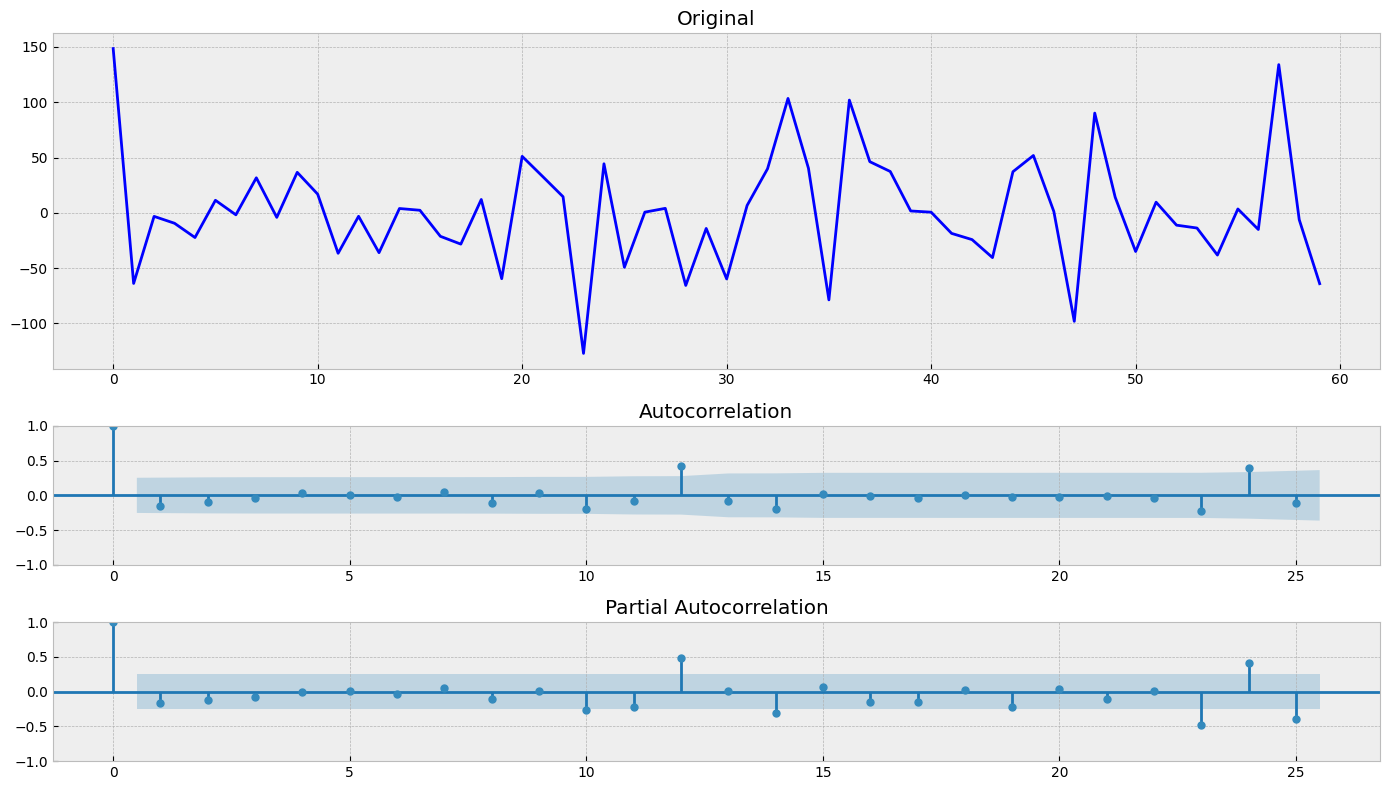

In [307]:
#Это нестационраный ряд
series = train

best_aic = np.inf 
best_order = None
best_mdl = None

for i in range(5):
    for d in range(5):
        for j in range(5):
            try:
                tmp_mdl = smt.ARIMA(series, order=(i,d,j), trend='t').fit()
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
            except: continue


print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))

tsplot(best_mdl.resid, lags=25)

In [323]:
best_mdl.predict(0, len(test))

0       5.465691
1     159.817669
2      76.187067
3      58.419829
4      58.300943
5      47.649074
6      96.761002
7     137.306734
8     214.094562
9     241.365659
10    281.086779
Name: predicted_mean, dtype: float64

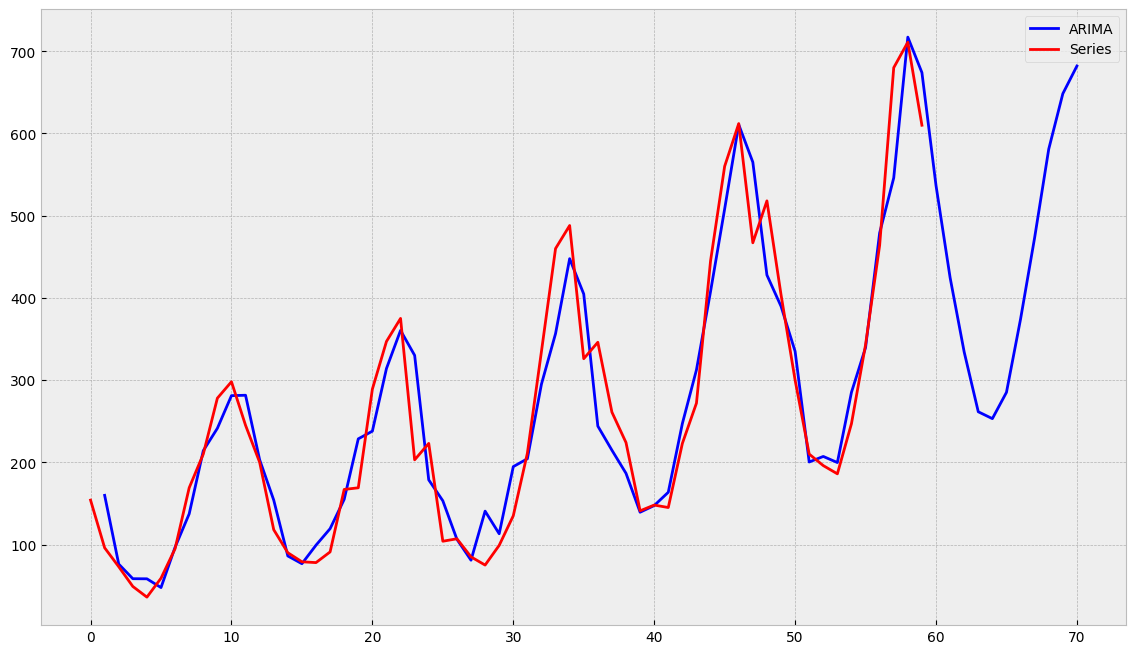

In [325]:
arima_fit = best_mdl.predict(0, len(series)+10)

with plt.style.context('bmh'):
    plt.figure(figsize=(14,8))
    ax = plt.axes()
    plt.plot(best_mdl.predict(1, len(series)+10), color='blue', label='ARIMA')
    plt.plot(series, color='red', label='Series')
    plt.legend()
    plt.show()

In [338]:
models = [ma_fit, wma_fit, ema_fit, dema_fit, arima_fit]

for model in models:
    print(model_metrics(test, model[-len(test):]))

{'MSE': 33403.93650243749, 'RMSE': 182.76743829916063, 'MAE': 153.97228096705868, 'R2': 0.1957697538060409}
{'MSE': 44328.5832288355, 'RMSE': 210.5435423584288, 'MAE': 190.92563360157246, 'R2': -0.06725108284630976}
{'MSE': 41535.29000000049, 'RMSE': 203.8020853671534, 'MAE': 171.06000887457523, 'R2': -1.176836406102666e-14}
{'MSE': 56935.40118811887, 'RMSE': 238.61140204969013, 'MAE': 208.17267526307904, 'R2': -0.3707717265996908}
{'MSE': 15205.705852842177, 'RMSE': 123.3114181770779, 'MAE': 107.07864122963944, 'R2': 0.6339087592059144}


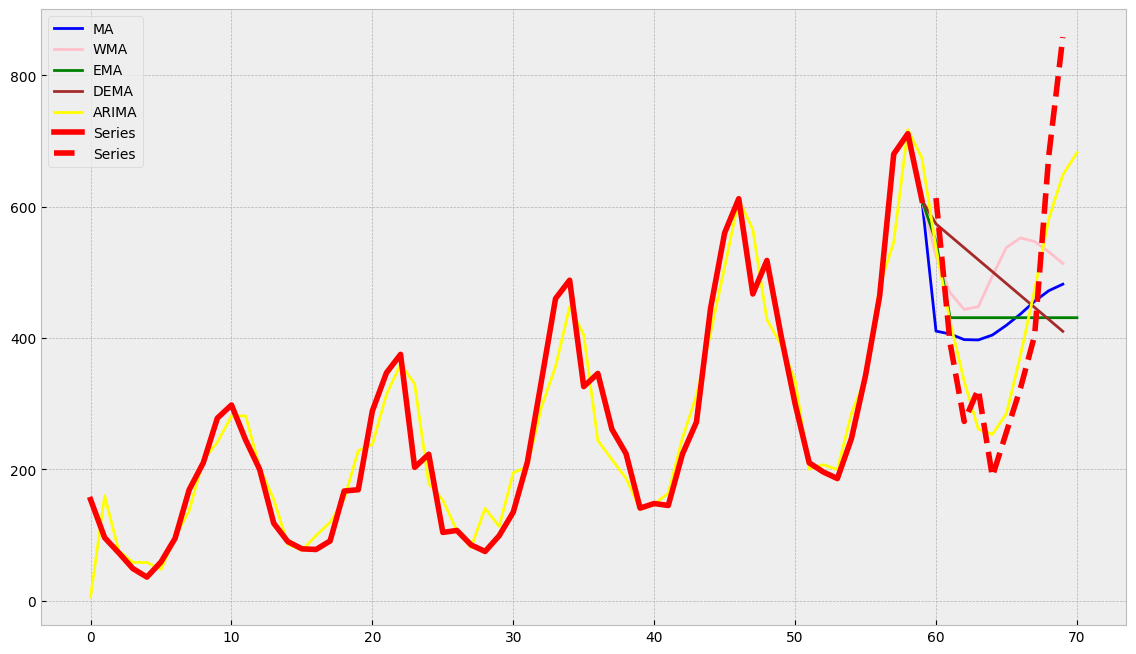

In [335]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14,8))
    ax = plt.axes()
    plt.plot(ma_fit, color='blue', label='MA')
    plt.plot(wma_fit, color='pink', label='WMA')
    plt.plot(ema_fit, color='green', label='EMA')
    plt.plot(dema_fit, color='brown', label='DEMA')
    plt.plot(arima_fit, color='yellow', label='ARIMA')
    plt.plot(series, color='red', label='Series', linewidth='4')
    plt.plot(test, color='red', label='Series', linewidth='4', linestyle='--')
    plt.legend()
    plt.show()

### Таким образом нам удалось построить модель ARIMA и достичь уровня точности (MSE) больше, чем у других моделей приближения